In [43]:
from gensim.models import KeyedVectors
from time import time 


# load de vectors with gensim 
tic = time()
word_vectors_fpath = "model/cc.de.300.word_vectors"
wv = KeyedVectors.load_word2vec_format(word_vectors_fpath, binary=False, unicode_errors="ignore")
print("Loaded in {} sec.".format(time()-tic))

# target words = Maus, Schlange

# iteratively subtract until the norm is not ...

# show the prorotypes (by printing their nns)



Loaded in 440.9788191318512 sec.


In [47]:
# save the model in the gensim format to load it fast again
de_gensim_fpath = "model/cc.de.300.word_vectors.gensim"

tic = time()
wv.save(de_gensim_fpath)
print("Saved in {} sec.".format(time()-tic))



Saved in 5.936842918395996 sec.


In [49]:
from gensim.models import Word2Vec

# load the model 

tic = time()
wvg = Word2Vec.load(de_gensim_fpath)
print("Loaded in {} sec.".format(time()-tic))

AttributeError: 'EuclideanKeyedVectors' object has no attribute 'negative'

In [ ]:
import re


first_not_letter = re.compile(r"^[^a-z]",re.IGNORECASE)
last_not_letter = re.compile(r"[^a-z]$", re.IGNORECASE)


def minimize(word):
    word = word.strip().lower()

    if first_not_letter.findall(word):
        word = word[1:]

    if last_not_letter.findall(word):
        word = word[:-1]

    return word



In [154]:
# from word_sense_induction import minimize 

from chinese_whispers import chinese_whispers, aggregate_clusters
from networkx import Graph

TOPN = 50
verbose = True
# load the wv here as a global variable ...


def get_nns(target, topn=TOPN):
    nns = wv.most_similar(positive=[target], negative=[], topn=topn)
    nns = [(word, score) for word, score in nns if minimize(word) != minimize(target)]
    return nns


def in_nns(nns, word):
    for w, s in nns:
        if minimize(word) == minimize(w):
            return True
        
    return False 


def get_

def get_disc_pairs(ego, topn=TOPN):  
    
    pairs = set()
    nns = get_nns(ego, topn)
    
    for i in range(len(nns)):
        topi = nns[i][0]
        nns_topi = get_nns(topi, topn) 
        nns_untopi = wv.most_similar(positive=[ego], negative=[topi], topn=topn)
        
        untopi = nns_untopi[0][0]
        if in_nns(nns, untopi):
            pairs.add( get_pair(topi, untopi) )

    return pairs

def get_nodes(pairs):
    nodes = set()
    for src, dst in pairs:
        nodes.add(src)
        nodes.add(dst)
    return nodes


def foo(ego, topn=TOPN):
    pairs = get_disc_pairs(ego, topn)
    nodes = get_nodes(pairs)
    
    return pairs, nodes


def list2dict(lst):
    return {p[0]: p[1] for p in lst}


def wsi(ego, topn=TOPN):
    tic = time()
    ego_network = Graph(name=ego)

    pairs = get_disc_pairs(ego, topn)
    nodes = get_nodes(pairs)   
    ego_network.add_nodes_from(nodes)

    for r_node in ego_network:
        related_related_nodes = list2dict(get_nns(r_node))
        related_related_nodes_ego = sorted(
            [(related_related_nodes[rr_node], rr_node) for rr_node in related_related_nodes if rr_node in ego_network],
            reverse=True)[:topn]
        
        related_edges = []
        for w, rr_node in related_related_nodes_ego:
            if 
            related_edges.append( (r_node, rr_node, {"weight": w}) )
        
        ego_network.add_edges_from(related_edges)

    chinese_whispers(ego_network, weighting="top", iterations=20)
    if verbose: print("{}\t{:f} sec.".format(ego, time()-tic))

    return ego_network


m = wsi("Maus")
s = wsi("Schlange")

Maus	6.684487 sec.
Schlange	6.942255 sec.


In [156]:
%matplotlib inline

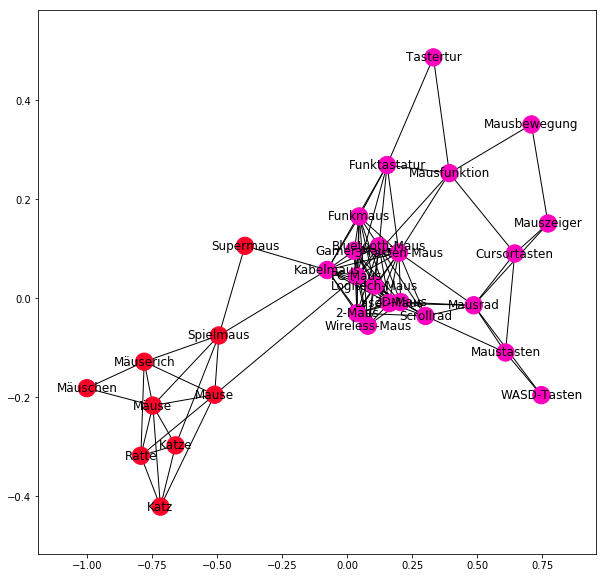

In [166]:
import networkx as nx
import matplotlib.pyplot as plt

G = m

colors = [1. / G.node[node]['label'] for node in G.nodes()]

fig = plt.gcf()
fig.set_size_inches(10, 10)

nx.draw_networkx(G, cmap=plt.get_cmap('gist_rainbow'), node_color=colors, font_color='black')

plt.show()

In [167]:
p_m

{('2-Maus', 'Katz'),
 ('3-Tasten-Maus', 'Katz'),
 ('3D-Maus', 'Katz'),
 ('Bluetooth-Maus', 'Katz'),
 ('Cursortasten', 'Katz'),
 ('Funkmaus', 'Katz'),
 ('Funktastatur', 'Katz'),
 ('Gamer-Maus', 'Katz'),
 ('Kabelmaus', 'Mauszeiger'),
 ('Katz', 'Laser-Maus'),
 ('Katz', 'Logitech-Maus'),
 ('Katz', 'PC-Maus'),
 ('Katz', 'WASD-Tasten'),
 ('Katz', 'Wireless-Maus'),
 ('Katze', 'Mausrad'),
 ('Mausbewegung', 'Mäuschen'),
 ('Mause', 'Mauszeiger'),
 ('Mausfunktion', 'Mäuse'),
 ('Mausrad', 'Mäuserich'),
 ('Mausrad', 'Ratte'),
 ('Maustasten', 'Supermaus'),
 ('Mauszeiger', 'Mäuse'),
 ('Mauszeiger', 'Spielmaus'),
 ('Mäuschen', 'PC-Maus'),
 ('Mäuserich', 'Tastertur'),
 ('Ratte', 'Scrollrad')}

In [ ]:
 
p_m, n_m = foo("Maus")
p_s, n_s = foo("Schlange")
print(len(p_m), len(n_m))
print(len(p_s), len(n_s))
print(p_m)
print(n_m)
print(p_s)
print(n_s)

In [56]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
